# 4.9 Python Visualization Part 2

#### This script contains the following:
1. Import libraries
2. Import data
3. A histogram showing sales by order_hour_of_day
4. A bar chart showing number of orders by loyalty flag
5. Line chart showing prices and order hour of day
6. Line chart exploring age and number of dependents
7. Scatterplot exploring age and income

### 01. Import libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

### 02. Import data

In [2]:
# 1) Import last merged data set with orders, products, and customers. 

path = r'C:\Users\keely\Documents\Courses\CareerFoundry\Immersion\Achievement 4 - Python\01-2023 Instacart Basket Analysis'

In [3]:
df_ords_prods_cust = pd.read_pickle(os.path.join(path,'02 Data','Prepared Data','ords_prods_custs_merged.pkl'))

In [ ]:
# 2) Make the charts from the lesson. Already done in first 4.9 script.

### 03. A histogram showing sales by order_hour_of_day

In [6]:
df_ords_prods_cust.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,spending_flag,med_days_since_prior_order,order_frequency_flag,gender,state,age,date_joined,no_children,marital_status,income
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,False,196,1,1,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,False,196,1,1,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,False,196,1,1,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,False,196,1,1,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423


In [7]:
# Making sure I understand what count of records includes. It was concluded each record contains a purchased product.

df_ords_prods_cust.loc[df_ords_prods_cust['order_id'] == '473747']


,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,spending_flag,med_days_since_prior_order,order_frequency_flag,gender,state,age,date_joined,no_children,marital_status,income
2,473747,1,3,3,12,21.0,False,196,1,1,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
13,473747,1,3,3,12,21.0,False,12427,2,1,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
26,473747,1,3,3,12,21.0,False,10258,3,1,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
39,473747,1,3,3,12,21.0,False,25133,4,0,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
47,473747,1,3,3,12,21.0,False,30450,5,0,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423


#### 3) You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column. In a markdown cell beneath this histogram, what this histogram demonstrates is described.

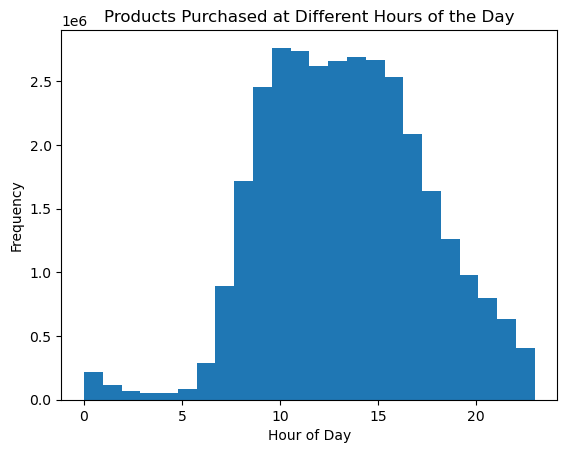

In [8]:
plt.title('Products Purchased at Different Hours of the Day', fontsize=12)
plt.xlabel('Hour of Day')
plt.ylabel('Number of Products')

hist_order_hour = df_ords_prods_cust['order_hour_of_day'].plot.hist(bins = 24)

##### This histogram above shows the count of records (which also means amount of products purchased, each row containing a product_id) for each hour of the day. This means that between 10 am to 3 or 4 pm, is fairly busy, with more products purchased during these hours than other times of day.

In [9]:
hist_order_hour.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_hour_3.png'))

### 04. A bar chart showing number of orders by loyalty flag.

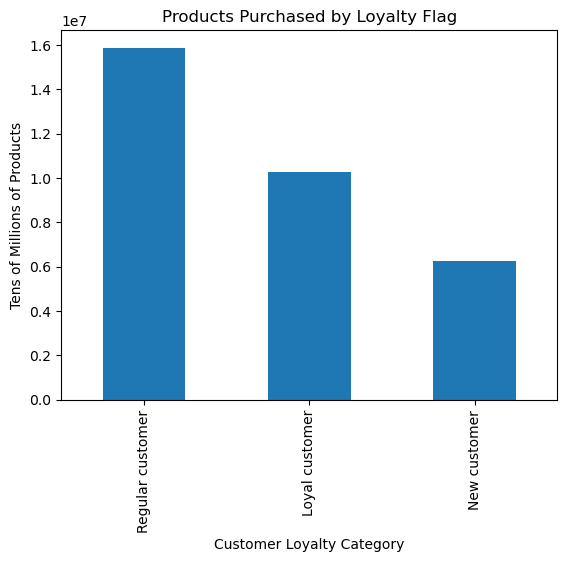

In [10]:
# 4) The marketing team is curious about the distribution of orders among customers in terms of loyalty. 
# Create a bar chart from the “loyalty_flag” column.

plt.title('Products Purchased by Loyalty Flag', fontsize=12)
plt.xlabel('Customer Loyalty Category')
plt.ylabel('Tens of Millions of Products')

bar_loyalty_orders = df_ords_prods_cust['loyalty_flag'].value_counts().plot.bar()

#### The chart above shows the number of products purchased by customers of different loyalty categories.

In [11]:
bar_loyalty_orders.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_orders_4.png'))

### 05. Line chart showing prices and order hour of day

In [4]:
# 5) Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. 
# (Hint: To check this, you need to use an accurate sample for your line chart!)

np.random.seed(5)
dev = np.random.rand(len(df_ords_prods_cust)) <= 0.7

In [5]:
dev

array([ True, False,  True, ...,  True, False,  True])

In [6]:
# Creating data set of values/records that meet the less than or equal to 0.7 for their assigned random number.

big = df_ords_prods_cust[dev]

In [7]:
# Creating data set of values/records that DO NOT meet the less than or equal to 0.7 for their assigned random number.

small = df_ords_prods_cust[~dev]

In [8]:
# Checking if the records in the big and small data sets add up to the orignal.

len(df_ords_prods_cust)

32404859

In [9]:
len(big) + len(small)

32404859

In [10]:
# Now, we create a subset of small, containing only order_hour_of_day and prices columns.

df_2 = small[['order_hour_of_day','prices']]

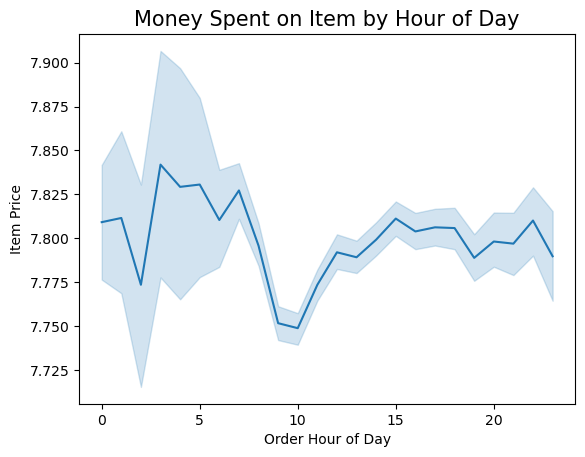

In [19]:
# Creating a line chart demonstrating the relationship between price of items bought and hour of day.

plt.title('Money Spent on Item by Hour of Day', fontsize=15 ) 
plt.xlabel('Order Hour of Day')
plt.ylabel('Item Price')

line = sns.lineplot(data = df_2, x = 'order_hour_of_day',y = 'prices')

In [20]:
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_hour_prices_5.png'))

#### It looks like people gravitate toward more expensive items a 5 am and at around 7 pm.

### 6. Line chart exploring age and number of dependents

In [11]:
#6) Show relationship of age and number of children via a line graph.

df_3 = small[['age','no_children']]

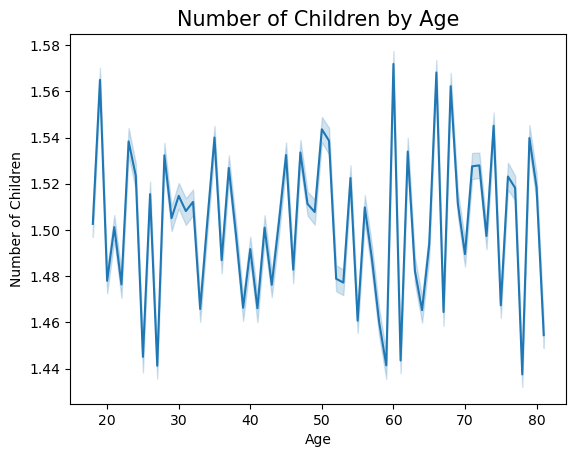

In [23]:
plt.title('Number of Children by Age', fontsize=15 ) 
plt.xlabel('Age')
plt.ylabel('Number of Children')

line_age_children = sns.lineplot(data = df_3, x = 'age',y = 'no_children')

In [24]:
line_age_children.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_children_6.png'))

#### There does not seem to be a clear relationship between age and number of children. However, this chart may highlight generations that had more children, generations that did not, and grandparents that may be raising children. For example, those in their early 20s, early 30s, mid 30s and early 50s seems to have a higher number of children while those in their 40s (older millenials and gen xers) did not. Also, there are peaks in age groups in the early and later 70s possibly indicating grandchildren or adult children, depending on how the data is being reported.

### 7. Scatterplot between age and income

In [12]:
# 7) Scatterplot showing relationship between age and income.

df_4 = small[['age','income']]

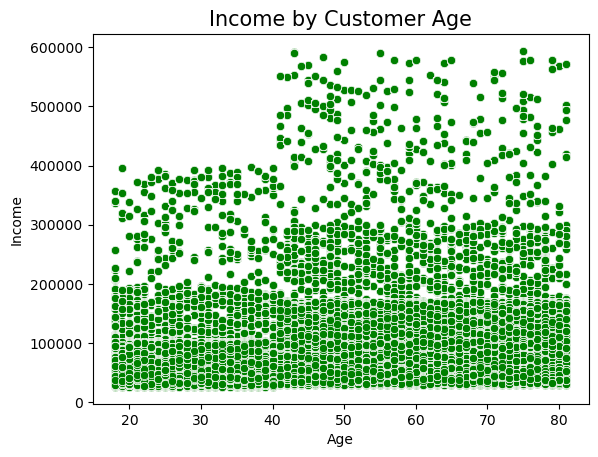

In [13]:
plt.title('Income by Customer Age', fontsize=15 ) 
plt.xlabel('Age')
plt.ylabel('Income')

scatter_age_income = sns.scatterplot(x = 'age', y = 'income',data = df_4, color = 'green')

#### The scatterplot shows that the incomes in general, are mostly under 300K with very few above that income threshold, regardless of age. However, there are more people making over 200K in the older age groups, from 40 to 80 years of age.

In [15]:
scatter_age_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_age_income.png'))